In [1]:
import os
os.chdir('D://scratch_backup//perl//alpine_reprocess//mnc-pt-pyrid//calcs//surfs//4n//')
import sys
sys.path.append('C://Users//User//PycharmProjects//Musgrave_scripts//BenRich//common_funcs//')
import numpy as np
import jdftxfuncs as jfunc
import cohpfuncs as cfunc
import plotfuncs as pfunc
import matplotlib.pyplot as plt

pCOHP_uv(orb u index, orb v index, Egrid, Emin, Emax, dE) -> pCOHP_uv(E) array


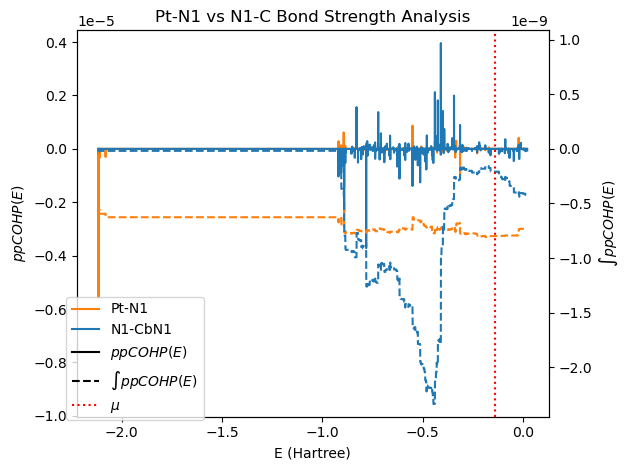

In [7]:
savename='plot_dif_nb.png'
bandfile='No_bias//bandProjections'
gvecfile='No_bias//Gvectors'
eigfile='No_bias//eigenvals'
outfile='No_bias//out'
S, R, mu = jfunc.get_vars(outfile)
proj, nStates, nBands, nProj, nOrbsPerAtom, wk, k_points, E = cfunc.parse_data(bandfile, gvecfile, eigfile, guts=False)
T_ijk, P_uvjk, e_jk = cfunc.prepare_small_funcs(proj, E)
pCOHP_uv, pCOHP_uv_u, H_atomic_matrix = cfunc.prepare_large_funcs(e_jk,P_uvjk,nBands,nStates,wk,k_points,guts=False,docuprint=True)
Emin = np.min(E)
Emax = np.max(E)
dE = 0.0001
Emax = cfunc.adjust_Emax(Emin, Emax, dE)
Egrid = np.arange(Emin, Emax, dE)
orbs_dict = cfunc.orbs_idx_dict(outfile, nOrbsPerAtom)
orbsN1 = orbs_dict['N #1']
# Orbitals for carbons bonded to N #1
orbsCbN1 = orbs_dict['C #29'] + orbs_dict['C #33']
orbsPt = orbs_dict['Pt #1']
COHP_Pt_N1 = pfunc.ez_pCOHP_sum(orbsPt, orbsN1, Egrid, Emin, Emax, dE, pCOHP_uv)
COHP_CbN1_N1 = pfunc.ez_pCOHP_sum(orbsCbN1, orbsN1, Egrid, Emin, Emax, dE, pCOHP_uv)
COHP_Pt_N1_int = pfunc.get_integrated_array(COHP_Pt_N1, dE)
COHP_CbN1_N1_int = pfunc.get_integrated_array(COHP_CbN1_N1, dE)
fig, ax = plt.subplots()
ax.plot(Egrid, COHP_Pt_N1, color='C1', label='Pt-N1')
ax.plot(Egrid, COHP_CbN1_N1, color='C0', label='N1-CbN1')
ax.set_xlabel('E (Hartree)')
ax.set_ylabel(r'$ppCOHP(E)$')
axint = ax.twinx()
axint.plot(Egrid, COHP_Pt_N1_int, color='C1', linestyle='--')
axint.plot(Egrid, COHP_CbN1_N1_int, color='C0', linestyle='--')
axint.set_ylabel(r'$\int ppCOHP(E)$')
line1 = ax.plot(0,0,color='black',label=r'$ppCOHP(E)$',linestyle='solid')
line2 = axint.plot(0,0,color='black',label=r'$\int ppCOHP(E)$',linestyle='--')

pfunc.align_yaxis(ax, axint)
plt.axvline(x=mu, color='r', label=r'$\mu$', linestyle='dotted')
plt.title('Pt-N1 vs N1-C Bond Strength Analysis')


fig.legend(loc='lower left', bbox_to_anchor=(0.1, 0.1))
fig.tight_layout()
fig.savefig(savename)

pCOHP_uv(orb u index, orb v index, Egrid, Emin, Emax, dE) -> pCOHP_uv(E) array


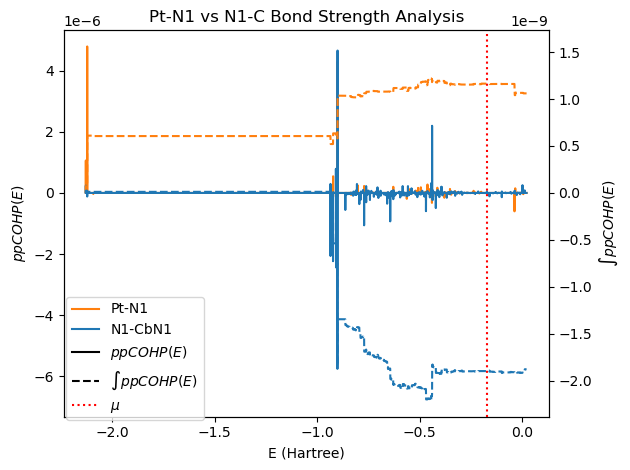

In [8]:
savename = 'plot_dif_0V.png'
bandfile='0.00V//bandProjections'
gvecfile='0.00V//Gvectors'
eigfile='0.00V//eigenvals'
outfile='0.00V//out'
S, R, mu = jfunc.get_vars(outfile)
proj, nStates, nBands, nProj, nOrbsPerAtom, wk, k_points, E = cfunc.parse_data(bandfile, gvecfile, eigfile, guts=False)
T_ijk, P_uvjk, e_jk = cfunc.prepare_small_funcs(proj, E)
pCOHP_uv, pCOHP_uv_u, H_atomic_matrix = cfunc.prepare_large_funcs(e_jk,P_uvjk,nBands,nStates,wk,k_points,guts=False,docuprint=True)
Emin = np.min(E)
Emax = np.max(E) + dE
dE = 0.0001
Emax = cfunc.adjust_Emax(Emin, Emax, dE)
Egrid = np.arange(Emin, Emax, dE)
orbs_dict = cfunc.orbs_idx_dict(outfile, nOrbsPerAtom)
orbsN1 = orbs_dict['N #1']
# Orbitals for carbons bonded to N #1
orbsCbN1 = orbs_dict['C #29'] + orbs_dict['C #33']
orbsPt = orbs_dict['Pt #1']
COHP_Pt_N1 = pfunc.ez_pCOHP_sum(orbsPt, orbsN1, Egrid, Emin, Emax, dE, pCOHP_uv)
COHP_CbN1_N1 = pfunc.ez_pCOHP_sum(orbsCbN1, orbsN1, Egrid, Emin, Emax, dE, pCOHP_uv)
COHP_Pt_N1_int = pfunc.get_integrated_array(COHP_Pt_N1, dE)
COHP_CbN1_N1_int = pfunc.get_integrated_array(COHP_CbN1_N1, dE)
fig, ax = plt.subplots()
ax.plot(Egrid, COHP_Pt_N1, color='C1', label='Pt-N1')
ax.plot(Egrid, COHP_CbN1_N1, color='C0', label='N1-CbN1')
ax.set_xlabel('E (Hartree)')
ax.set_ylabel(r'$ppCOHP(E)$')
axint = ax.twinx()
axint.plot(Egrid, COHP_Pt_N1_int, color='C1', linestyle='--')
axint.plot(Egrid, COHP_CbN1_N1_int, color='C0', linestyle='--')
axint.set_ylabel(r'$\int ppCOHP(E)$')
line1 = ax.plot(0,0,color='black',label=r'$ppCOHP(E)$',linestyle='solid')
line2 = axint.plot(0,0,color='black',label=r'$\int ppCOHP(E)$',linestyle='--')

pfunc.align_yaxis(ax, axint)
plt.axvline(x=mu, color='r', label=r'$\mu$', linestyle='dotted')
plt.title('Pt-N1 vs N1-C Bond Strength Analysis')


fig.legend(loc='lower left', bbox_to_anchor=(0.1, 0.1))
fig.tight_layout()
fig.savefig(savename)

pCOHP_uv(orb u index, orb v index, Egrid, Emin, Emax, dE) -> pCOHP_uv(E) array


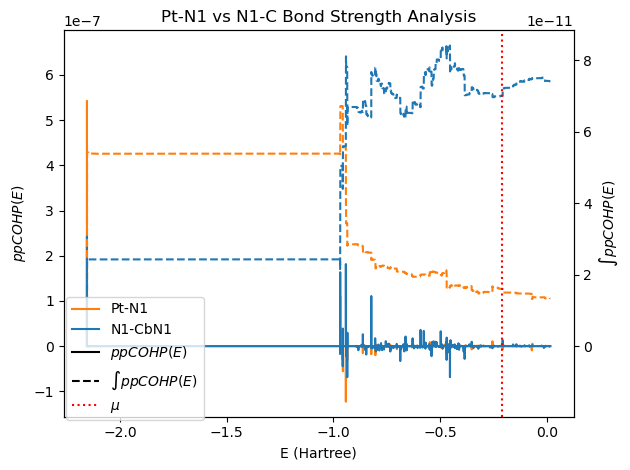

In [9]:
savename = 'plot_dif_1V.png'
bandfile='1.00V//bandProjections'
gvecfile='1.00V//Gvectors'
eigfile='1.00V//eigenvals'
outfile='1.00V//out'
S, R, mu = jfunc.get_vars(outfile)
proj, nStates, nBands, nProj, nOrbsPerAtom, wk, k_points, E = cfunc.parse_data(bandfile, gvecfile, eigfile, guts=False)
T_ijk, P_uvjk, e_jk = cfunc.prepare_small_funcs(proj, E)
pCOHP_uv, pCOHP_uv_u, H_atomic_matrix = cfunc.prepare_large_funcs(e_jk,P_uvjk,nBands,nStates,wk,k_points,guts=False,docuprint=True)
Emin = np.min(E)
Emax = np.max(E) + dE
dE = 0.0001
Emax = cfunc.adjust_Emax(Emin, Emax, dE)
Egrid = np.arange(Emin, Emax, dE)
orbs_dict = cfunc.orbs_idx_dict(outfile, nOrbsPerAtom)
orbsN1 = orbs_dict['N #1']
# Orbitals for carbons bonded to N #1
orbsCbN1 = orbs_dict['C #29'] + orbs_dict['C #33']
orbsPt = orbs_dict['Pt #1']
COHP_Pt_N1 = pfunc.ez_pCOHP_sum(orbsPt, orbsN1, Egrid, Emin, Emax, dE, pCOHP_uv)
COHP_CbN1_N1 = pfunc.ez_pCOHP_sum(orbsCbN1, orbsN1, Egrid, Emin, Emax, dE, pCOHP_uv)
COHP_Pt_N1_int = pfunc.get_integrated_array(COHP_Pt_N1, dE)
COHP_CbN1_N1_int = pfunc.get_integrated_array(COHP_CbN1_N1, dE)
fig, ax = plt.subplots()
ax.plot(Egrid, COHP_Pt_N1, color='C1', label='Pt-N1')
ax.plot(Egrid, COHP_CbN1_N1, color='C0', label='N1-CbN1')
ax.set_xlabel('E (Hartree)')
ax.set_ylabel(r'$ppCOHP(E)$')
axint = ax.twinx()
axint.plot(Egrid, COHP_Pt_N1_int, color='C1', linestyle='--')
axint.plot(Egrid, COHP_CbN1_N1_int, color='C0', linestyle='--')
axint.set_ylabel(r'$\int ppCOHP(E)$')
line1 = ax.plot(0,0,color='black',label=r'$ppCOHP(E)$',linestyle='solid')
line2 = axint.plot(0,0,color='black',label=r'$\int ppCOHP(E)$',linestyle='--')

pfunc.align_yaxis(ax, axint)
plt.axvline(x=mu, color='r', label=r'$\mu$', linestyle='dotted')
plt.title('Pt-N1 vs N1-C Bond Strength Analysis')


fig.legend(loc='lower left', bbox_to_anchor=(0.1, 0.1))
fig.tight_layout()
fig.savefig(savename)

pCOHP_uv(orb u index, orb v index, Egrid, Emin, Emax, dE) -> pCOHP_uv(E) array


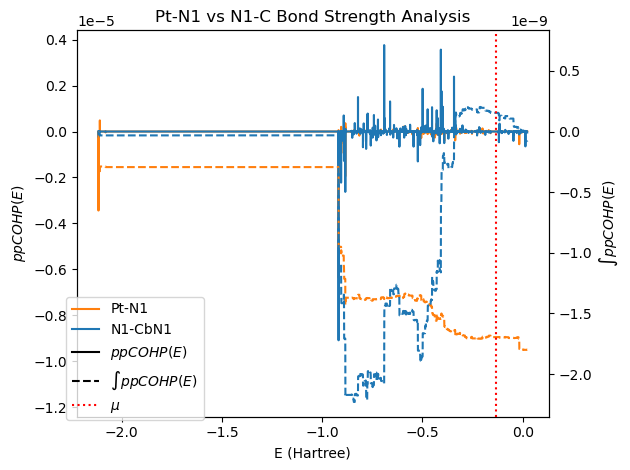

In [10]:
savename = 'plot_dif_n1V.png'
bandfile='-1.00V//bandProjections'
gvecfile='-1.00V//Gvectors'
eigfile='-1.00V//eigenvals'
outfile='-1.00V//out'
S, R, mu = jfunc.get_vars(outfile)
proj, nStates, nBands, nProj, nOrbsPerAtom, wk, k_points, E = cfunc.parse_data(bandfile, gvecfile, eigfile, guts=False)
T_ijk, P_uvjk, e_jk = cfunc.prepare_small_funcs(proj, E)
pCOHP_uv, pCOHP_uv_u, H_atomic_matrix = cfunc.prepare_large_funcs(e_jk,P_uvjk,nBands,nStates,wk,k_points,guts=False,docuprint=True)
Emin = np.min(E)
Emax = np.max(E) + dE
dE = 0.0001
Emax = cfunc.adjust_Emax(Emin, Emax, dE)
Egrid = np.arange(Emin, Emax, dE)
orbs_dict = cfunc.orbs_idx_dict(outfile, nOrbsPerAtom)
orbsN1 = orbs_dict['N #1']
# Orbitals for carbons bonded to N #1
orbsCbN1 = orbs_dict['C #29'] + orbs_dict['C #33']
orbsPt = orbs_dict['Pt #1']
COHP_Pt_N1 = pfunc.ez_pCOHP_sum(orbsPt, orbsN1, Egrid, Emin, Emax, dE, pCOHP_uv)
COHP_CbN1_N1 = pfunc.ez_pCOHP_sum(orbsCbN1, orbsN1, Egrid, Emin, Emax, dE, pCOHP_uv)
COHP_Pt_N1_int = pfunc.get_integrated_array(COHP_Pt_N1, dE)
COHP_CbN1_N1_int = pfunc.get_integrated_array(COHP_CbN1_N1, dE)
fig, ax = plt.subplots()
ax.plot(Egrid, COHP_Pt_N1, color='C1', label='Pt-N1')
ax.plot(Egrid, COHP_CbN1_N1, color='C0', label='N1-CbN1')
ax.set_xlabel('E (Hartree)')
ax.set_ylabel(r'$ppCOHP(E)$')
axint = ax.twinx()
axint.plot(Egrid, COHP_Pt_N1_int, color='C1', linestyle='--')
axint.plot(Egrid, COHP_CbN1_N1_int, color='C0', linestyle='--')
axint.set_ylabel(r'$\int ppCOHP(E)$')
line1 = ax.plot(0,0,color='black',label=r'$ppCOHP(E)$',linestyle='solid')
line2 = axint.plot(0,0,color='black',label=r'$\int ppCOHP(E)$',linestyle='--')

pfunc.align_yaxis(ax, axint)
plt.axvline(x=mu, color='r', label=r'$\mu$', linestyle='dotted')
plt.title('Pt-N1 vs N1-C Bond Strength Analysis')


fig.legend(loc='lower left', bbox_to_anchor=(0.1, 0.1))
fig.tight_layout()
fig.savefig(savename)